# **importing the required libraries**

In [61]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from numpy import int64
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# loading the dataset

In [62]:
df = pd.read_csv("/content/hour.csv",encoding='latin1')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# **Data Cleaning**

Missing data can either be filled with the means of the features or maybe 0 to ignore them or even other data imputation techniques to predict the missing values
In this case the mean of the features is taken for the missing values.

In [63]:
# Handling the NULL values
df = df.fillna(df.mean())
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [64]:
# Applying label encodings
from sklearn.preprocessing import LabelEncoder
df['dteday'] = LabelEncoder().fit_transform(df['dteday'])
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,0,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,0,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,0,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


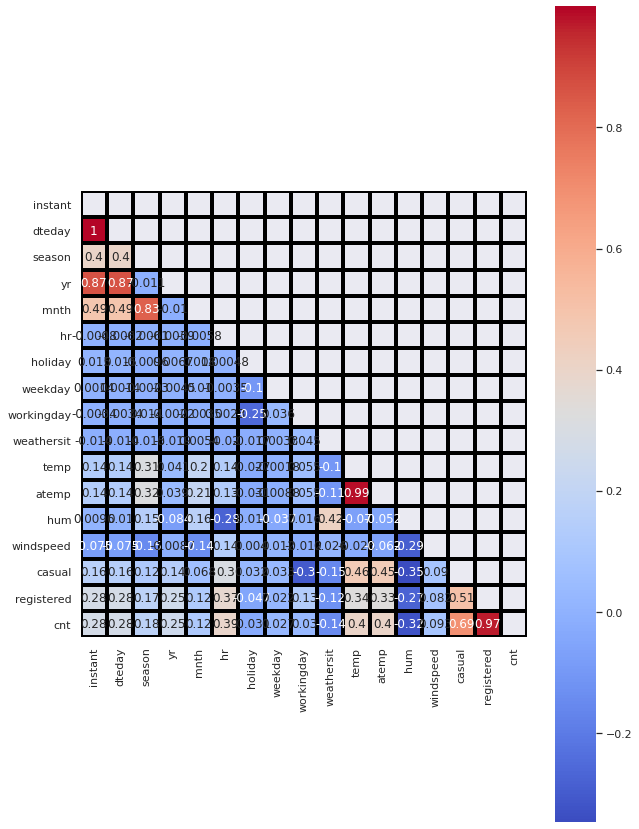

In [65]:
#plotting correlation values
matrix = np.triu(df.corr())
sns.set(rc={'figure.figsize':(10,15)})
sns.heatmap(df.corr(), annot = True,cmap= 'coolwarm' ,linewidths=3, linecolor='black', square=True , mask=matrix)

# Linear Regression

In [66]:
# Selecting the DEPENDENT and INDEPENDENT  varables.
y = df['cnt']
x = df[['instant','dteday','season','yr','mnth','hr','holiday','weekday','workingday','weathersit','hum','windspeed','casual','registered']]

In [67]:
# Splitting the dataset into TRAIN and TEST data. 
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)

#Split data into training and testing datasets 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [68]:
#Linear regression using SKLearn Linear Regression method
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
#Build linear regression model
model = Lasso()
# Train the model, using training data set
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Intercept =', model.intercept_)
print('Coefficients = ', model.coef_)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(  mse)
r2score = r2_score(y_test, y_pred)
print("Mean squared error(MSE) = %.2f" %   mse)
print("Root Mean squared error(RMSE) = %.2f" % rmse)
print('R2 score = %.2f' % r2score)

Intercept = 7.235236639746006
Coefficients =  [  0.           0.           0.           0.           0.
   0.           0.           0.          -0.          -0.
  -0.           0.         321.40621829 869.78798513]
Mean squared error(MSE) = 64.69
Root Mean squared error(RMSE) = 8.04
R2 score = 1.00


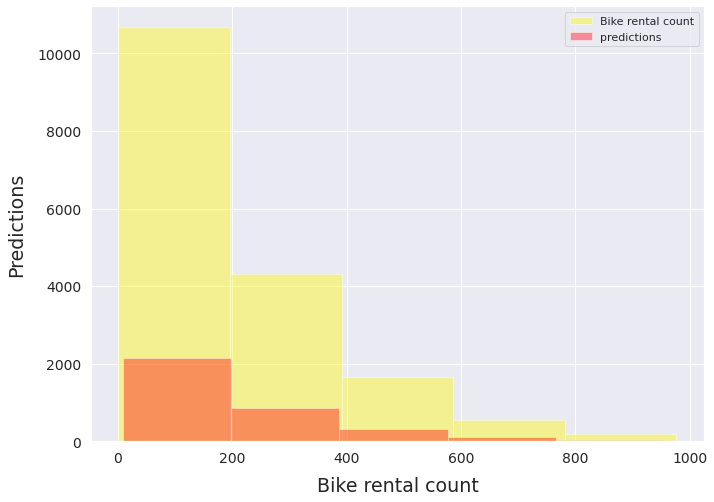

In [69]:
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(df.cnt, kde=False,color='#FFFB00', bins=5, label='Bike rental count')
sns.distplot(y_pred, kde=False, color='#FF000C', bins=5, label='predictions')

plt.xlabel('Bike rental count', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Predictions', fontsize=19, labelpad=11)
plt.yticks(fontsize=14)
plt.legend(loc='upper right');

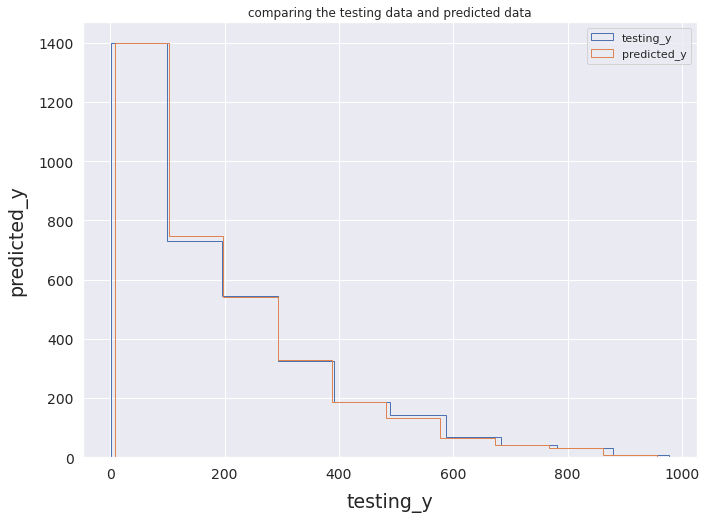

In [70]:
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(y_test,label='testing_y',histtype='step')
ax.hist(y_pred,label='predicted_y',histtype='step')
plt.title('comparing the testing data and predicted data')
plt.xlabel('testing_y', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('predicted_y', fontsize=19, labelpad=11)
plt.yticks(fontsize=14)
plt.legend(loc='upper right');
#looking at the distribution of my target variable versus my predictions

In [71]:
#predicted values and testing values are close to each other in visualization

In [72]:
#predicted values and testing values are close to each other in the **dataframe**
p = pd.DataFrame(list(zip(x_test,y_test,y_pred)),columns=['x','target_y','predicted_y'])
p.head()

,x,target_y,predicted_y
0,"[0.1978938888249511, 0.20136986301369864, 0.33...",7,13.683408
1,"[0.37645298653469905, 0.37945205479452054, 1.0...",5,12.037811
2,"[0.8902060075958108, 0.8890410958904109, 1.0, ...",743,728.059038
3,"[0.5668661526067442, 0.5684931506849316, 0.0, ...",208,206.662147
4,"[0.7273564276671655, 0.7273972602739726, 0.333...",333,325.349340
